In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X = scaler.fit_transform(df)

In [15]:
scaled_X[:5,]

array([[ 1.09706398e+00, -2.07333501e+00,  1.26993369e+00,
         9.84374905e-01,  1.56846633e+00,  3.28351467e+00,
         2.65287398e+00,  2.53247522e+00,  2.21751501e+00,
         2.25574689e+00,  2.48973393e+00, -5.65265059e-01,
         2.83303087e+00,  2.48757756e+00, -2.14001647e-01,
         1.31686157e+00,  7.24026158e-01,  6.60819941e-01,
         1.14875667e+00,  9.07083081e-01,  1.88668963e+00,
        -1.35929347e+00,  2.30360062e+00,  2.00123749e+00,
         1.30768627e+00,  2.61666502e+00,  2.10952635e+00,
         2.29607613e+00,  2.75062224e+00,  1.93701461e+00],
       [ 1.82982061e+00, -3.53632408e-01,  1.68595471e+00,
         1.90870825e+00, -8.26962447e-01, -4.87071673e-01,
        -2.38458552e-02,  5.48144156e-01,  1.39236330e-03,
        -8.68652457e-01,  4.99254601e-01, -8.76243603e-01,
         2.63326966e-01,  7.42401948e-01, -6.05350847e-01,
        -6.92926270e-01, -4.40780058e-01,  2.60162067e-01,
        -8.05450380e-01, -9.94437403e-02,  1.80592744e+

In [16]:
scaled_X.mean()

-6.826538293184326e-17

In [17]:
covariance_matrix = np.cov(scaled_X, rowvar = False)

In [18]:
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

In [19]:
eigen_vectors

array([[ 2.18902444e-01, -2.33857132e-01, -8.53124284e-03,
         4.14089623e-02, -3.77863538e-02,  1.87407904e-02,
         1.24088340e-01,  7.45229622e-03, -2.23109764e-01,
         9.54864432e-02,  4.14714866e-02,  5.10674568e-02,
         1.19672116e-02, -5.95061348e-02, -5.11187749e-02,
         1.50583883e-01, -2.02924255e-01, -1.46712338e-01,
        -2.25384659e-01, -7.02414091e-01,  2.11460455e-01,
        -2.11194013e-01, -1.31526670e-01,  1.29476396e-01,
         1.92264989e-02, -1.82579441e-01,  9.85526942e-02,
        -7.29289034e-02, -4.96986642e-02,  6.85700057e-02],
       [ 1.03724578e-01, -5.97060883e-02,  6.45499033e-02,
        -6.03050001e-01,  4.94688505e-02, -3.21788366e-02,
        -1.13995382e-02, -1.30674825e-01,  1.12699390e-01,
         2.40934066e-01, -3.02243402e-01,  2.54896423e-01,
         2.03461333e-01,  2.15600995e-02, -1.07922421e-01,
         1.57841960e-01,  3.87061187e-02,  4.11029851e-02,
        -2.97886446e-02, -2.73661018e-04, -1.05339342e-

In [20]:
eigen_vectors.shape

(30, 30)

In [21]:
num_components = 2

In [24]:
sorted_key = np.argsort(eigen_values)[::-1][:num_components]

In [25]:
sorted_key

array([0, 1])

In [26]:
eigen_values, eigen_vectors = eigen_values[sorted_key], eigen_vectors[:, sorted_key]

In [27]:
principal_components = np.dot(scaled_X, eigen_vectors)

<AxesSubplot:>

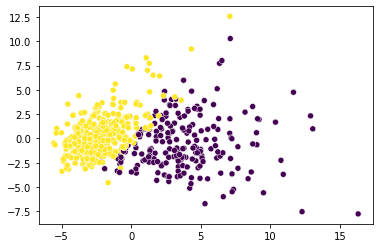

In [33]:
sns.scatterplot(data = principal_components, x = principal_components[:, 0], y = principal_components[:, 1], c = cancer_dictionary['target'])

In [29]:
from sklearn.datasets import load_breast_cancer

In [30]:
cancer_dictionary = load_breast_cancer()

In [31]:
cancer_dictionary.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [34]:
df1 = pd.read_csv('../DATA/cancer_tumor_data_features.csv')

In [35]:
scaler = StandardScaler()

In [36]:
scaled_X = scaler.fit_transform(df1)

In [37]:
from sklearn.decomposition import PCA

In [38]:
pca_model = PCA(n_components = 2)

In [40]:
pc_results = pca_model.fit_transform(scaled_X)

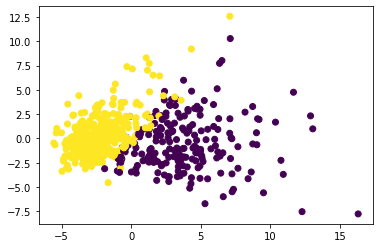

In [42]:
plt.scatter(pc_results[:, 0], pc_results[:, 1], c = cancer_dictionary['target'])

In [44]:
df_comp = pd.DataFrame(pca_model.components_, index=['PC1', 'PC2'], columns = df1.columns)

In [45]:
df_comp

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
PC1,0.218902,0.103725,0.227537,0.220995,0.142590,0.239285,0.258400,0.260854,0.138167,0.064363,...,0.227997,0.104469,0.236640,0.224871,0.127953,0.210096,0.228768,0.250886,0.122905,0.131784
PC2,-0.233857,-0.059706,-0.215181,-0.231077,0.186113,0.151892,0.060165,-0.034768,0.190349,0.366575,...,-0.219866,-0.045467,-0.199878,-0.219352,0.172304,0.143593,0.097964,-0.008257,0.141883,0.275339


<AxesSubplot:>

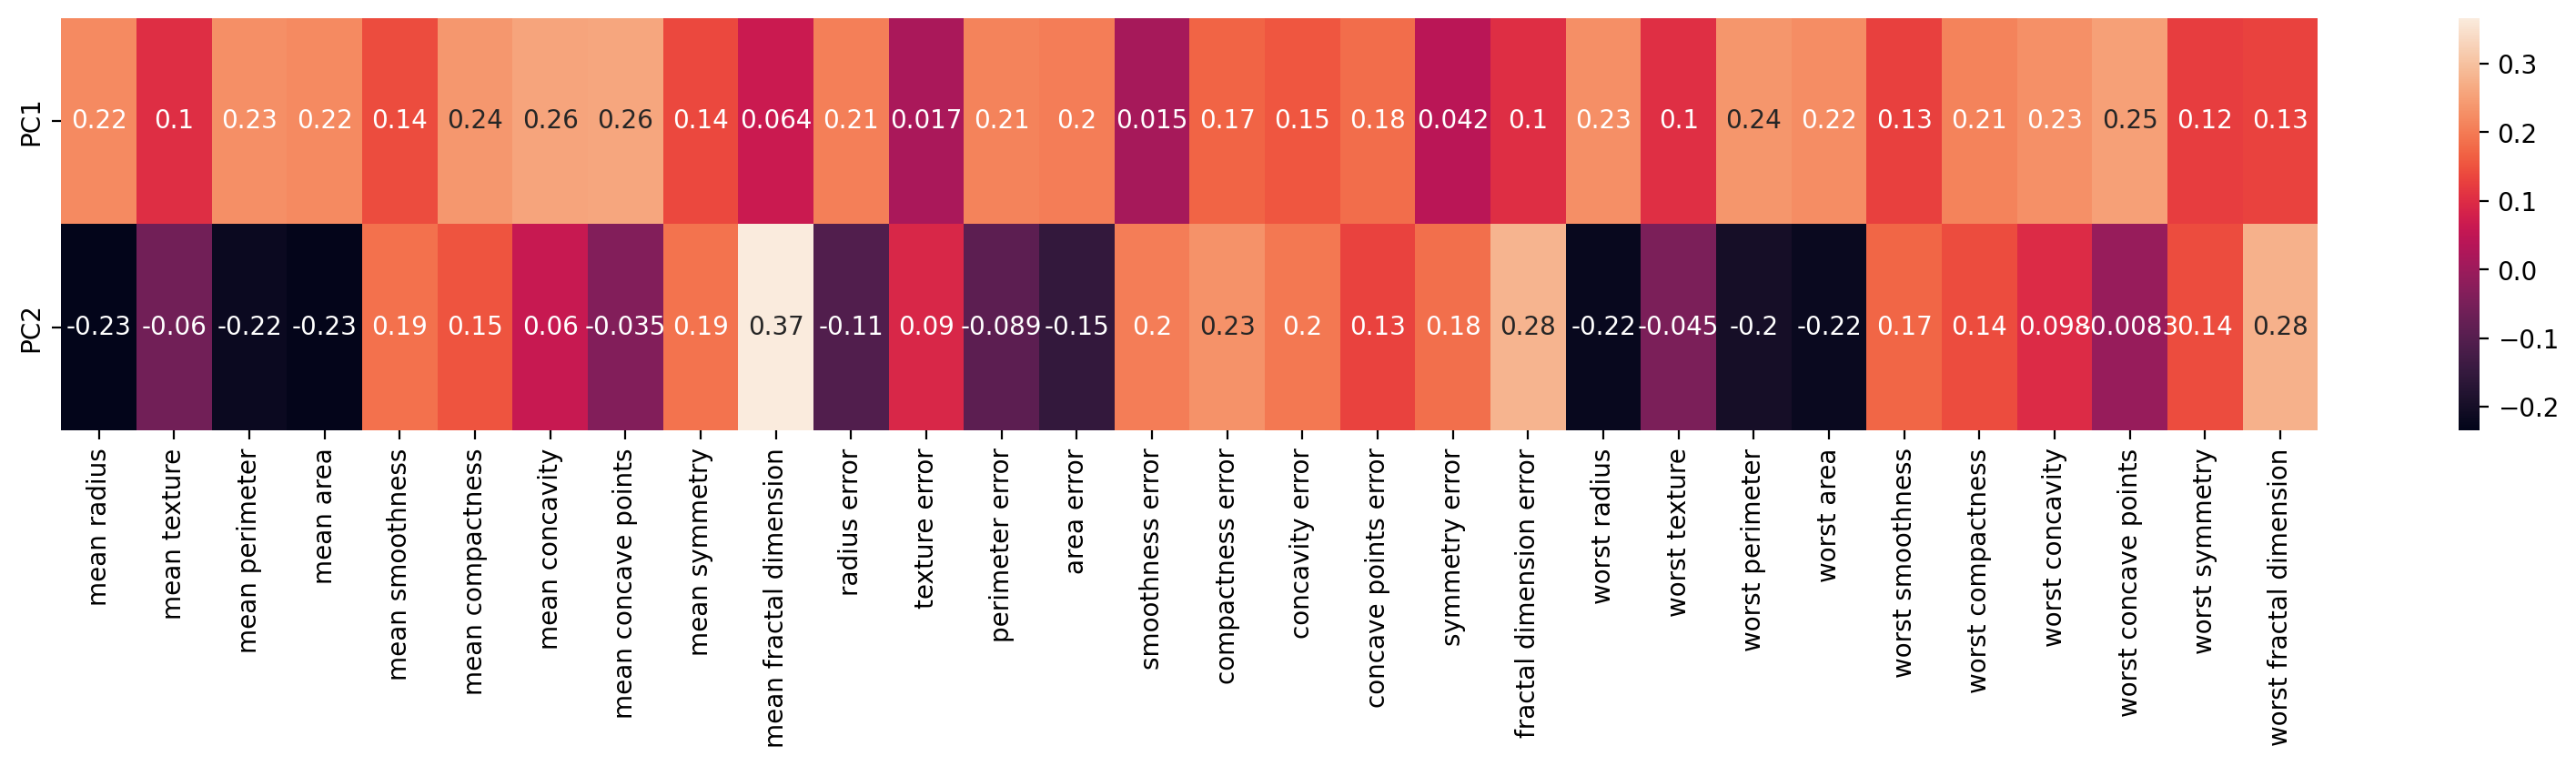

In [47]:
plt.figure(figsize = (20, 3), dpi = 200)
sns.heatmap(df_comp, annot =True)

In [48]:
pca_model.explained_variance_ratio_

array([0.44272026, 0.18971182])

In [49]:
np.sum(pca_model.explained_variance_ratio_)

0.6324320765155939

In [50]:
explained_variance = []

for n in range(1, 30):
    pca = PCA(n_components=n)
    pca.fit(scaled_X)
    explained_variance.append(np.sum(pca.explained_variance_ratio_))

Text(0, 0.5, 'Explained variance')

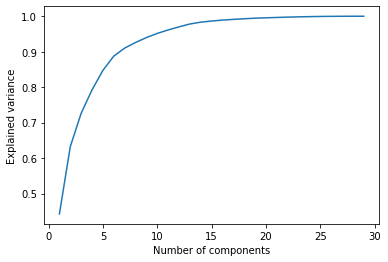

In [51]:
plt.plot(range(1, 30), explained_variance)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

In [53]:
v1 = np.array([[1, 0], [0, 1]])
v2 = np.array([[2, -1], [1, 1]])

In [55]:
v2_inv = np.linalg.inv(v2)

In [56]:
M = v2_inv @ v1

In [57]:
M

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

In [58]:
v2_inv

array([[ 0.33333333,  0.33333333],
       [-0.33333333,  0.66666667]])

In [59]:
v2

array([[ 2, -1],
       [ 1,  1]])

In [62]:
res = v2_inv @ np.array([[8], [6]])

In [63]:
res

array([[4.66666667],
       [1.33333333]])

In [82]:
b2 = np.array([[3,-3], [4, -5]])
b2_inv = np.linalg.inv(b2)

In [83]:
M = b2_inv @ v1

In [85]:
res = M @ np.array([[3], [2]])

In [86]:
res

array([[3.],
       [2.]])

In [79]:
m_inv = np.linalg.inv(M)

In [80]:
res = m_inv @ np.array([[1], [1]])

In [81]:
res

array([[3.],
       [2.]])

In [76]:
res

array([[ 9.],
       [18.]])

In [84]:
M

array([[ 1.66666667, -1.        ],
       [ 1.33333333, -1.        ]])

In [87]:
v3 = np.array([[2,1], [3,2],[2,1],[5,1]])
v3_d = pd.DataFrame(v3, columns = np.array(['x', 'y']))

In [88]:
v3_d

,x,y
0,2,1
1,3,2
2,2,1
3,5,1


In [90]:
np.cov(v3_d, rowvar=False)

array([[2.  , 0.  ],
       [0.  , 0.25]])

In [91]:
from sklearn.datasets import load_iris

In [92]:
iris = load_iris()

In [93]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [94]:
scaled_X = scaler.fit_transform(iris['data'])

In [100]:
pca_model = PCA(random_state=42, n_components = 2)

In [101]:
pca_model.fit(scaled_X)

PCA(n_components=2, random_state=42)

In [102]:
pca_model.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [103]:
pca_model.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [104]:
results = pca_model.transform(scaled_X)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

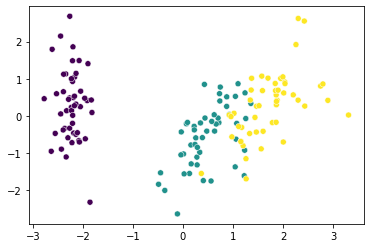

In [111]:
sns.scatterplot(results[:, 0], results[:, 1], c = iris['target'])